In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [16]:
from keras.models import Sequential
from tensorflow.keras import metrics
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score 
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization, Activation

In [2]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
features = train.drop("label", axis=1)
label = train["label"]

features = np.array(features, dtype="float32")/255
label = np.array(label)
test = np.array(test, dtype="float32")

In [28]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size = 0.3)

In [29]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
test = test.reshape(test.shape[0],28,28,1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [9]:
model=Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


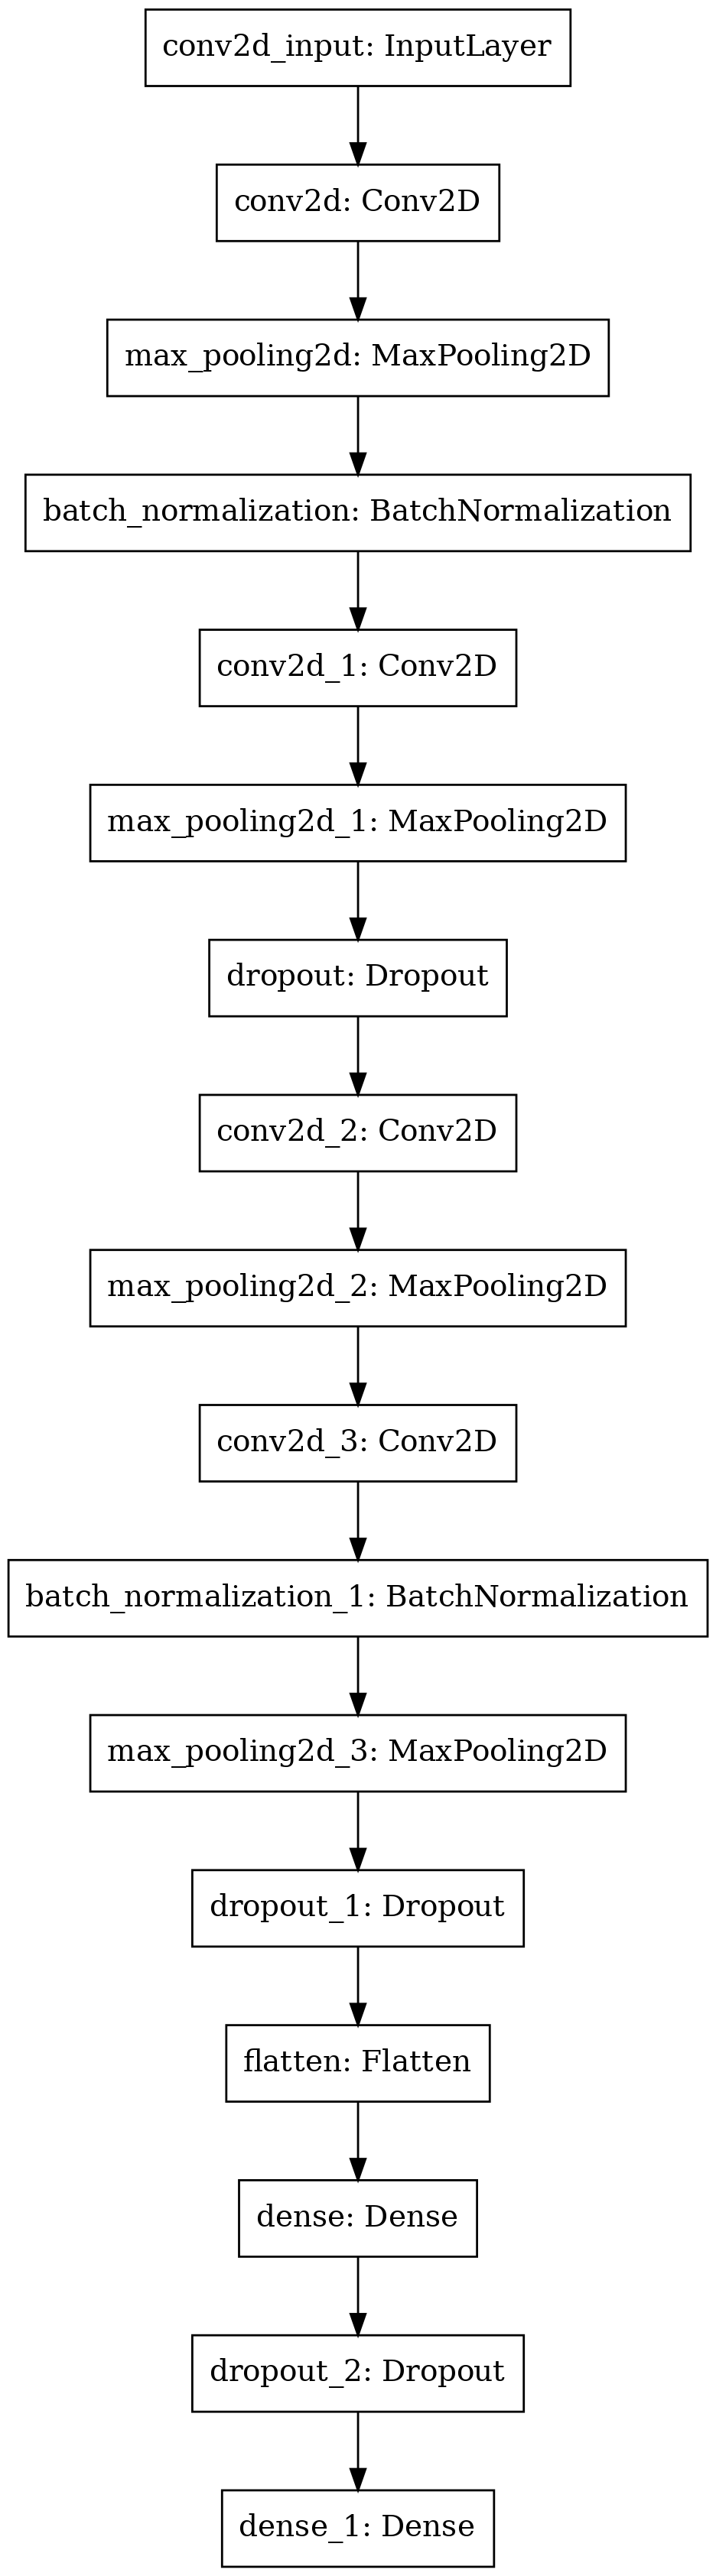

In [12]:
plot_model(model,dpi=200)

In [14]:
metrics = ['accuracy',metrics.Precision(name='precision'),metrics.Recall(name='recall')] 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
919/919 [==============================] - 25s 26ms/step - loss: 0.7497 - accuracy: 0.7458 - precision: 0.8824 - recall: 0.6653 - val_loss: 0.0988 - val_accuracy: 0.9696 - val_precision: 0.9742 - val_recall: 0.9655
Epoch 2/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1100 - accuracy: 0.9663 - precision: 0.9715 - recall: 0.9614 - val_loss: 0.0560 - val_accuracy: 0.9838 - val_precision: 0.9854 - val_recall: 0.9824
Epoch 3/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0833 - accuracy: 0.9750 - precision: 0.9789 - recall: 0.9717 - val_loss: 0.0646 - val_accuracy: 0.9817 - val_precision: 0.9841 - val_recall: 0.9810
Epoch 4/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0662 - accuracy: 0.9792 - precision: 0.9815 - recall: 0.9771 - val_loss: 0.0495 - val_accuracy: 0.9848 - val_precision: 0.9862 - val_recall: 0.9837
Epoch 5/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0603 - accuracy: 0

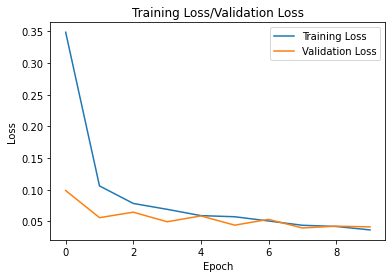

In [17]:
N = 10

plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="Validation Loss")
plt.title("Training Loss/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [38]:
preds = model.predict(X_val)
preds = np.argmax(preds, axis=1)

In [39]:
print(classification_report(y_val.argmax(axis=1), preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1241
           1       0.99      1.00      0.99      1388
           2       1.00      0.99      0.99      1223
           3       1.00      1.00      1.00      1308
           4       1.00      0.98      0.99      1222
           5       1.00      0.99      0.99      1130
           6       0.99      0.99      0.99      1266
           7       0.99      1.00      0.99      1322
           8       0.99      0.99      0.99      1221
           9       0.99      0.99      0.99      1279

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600

